# Capítulo 6 - Objetos de alinhamento de sequência múltipla

Nesse capítulo falaremos sobre Alinhamentos de Sequências Múltiplas, o que significa uma coleção de sequências múltiplas que foram alinhadas juntas (normalmente com a inserção de caracteres de gap e adição de lacunas à esquerda ou à direita) de modo que todas as strings de sequência possua o mesmo tamanho. Esse alinhamento pode ser considerado uma matriz de letras, onde cada linha pertence a um objeto **SeqRecord**.

Vamos aprender a usar o objeto **MultipleSeqAlignment** que contém este tipo de dado e o módulo `Bio.AlignIO` para leitura e escrita dos vários tipos de formato de arquivo (o `Bio.AlignIO` segue o mesmo design do `Bio.SeqIO`). Observe que tanto o `Bio.SeqIO` como o `Bio.AlignIO` podem ler e escrever arquivos de alinhamento de sequências. A escolha apropriada dependerá do que você quer fazer com os dados.

A parte final deste capítulo é sobre como usar a linha de comando para os alinhamentos de sequências múltiplas com as ferramentas ClustalW e MUSCLE.

## 6.1 Análise ou leitura de alinhamentos de sequência

Assim como o `Bio.SeqIO`, o `Bio.AlignIO` possui duas funções de análise, a **read** e **parse** que funcionam da mesma maneira que o módulo do capítulo anterior (https://github.com/GTL98/biopython_br/tree/main/Cap%205%20-%20Sequ%C3%AAncias%20Input_Output).

Usando o `Bio.AlignIO.parse()` será retornado um iterador com objetos **MultipleSeqAlignment**. Iteradores são normalmente usados em loops. Alguns exemplos onde você terá diferentes alinhamentos múltiplos incluem reamostragem de alinhamentos vindo de arquivos PHYLIP da ferramenta seeqboot, ou múltiplos alinhamentos de pares de arquivos EMBOSS das ferramentas water ou  needle, ou ferramentas FASTA de Bill Pearson.

Entretanto, em diversas situações você trabalhará com arquivos que contêm somente um alinhamento. Nesses casos, você deverá usar a função **read** para retornar somente um objetos **MultipleSeqAlignment**.

Ambas as funções (**read** e **parse**) necessitam de dois argumentos mandatórios:

- O primeiro argumento é o *identificador* do arquivo que deverá ser lido, geralmente um arquivo já aberto ou o próprio nome do arquivo e;

- O segundo argumento é uma string em minúsculo com o formato de arquivo. Como em `Bio.SeqIO`, não devemos adivinhar o formato de arquivo; veja https://biopython.org/wiki/AlignIO para saber quais são os formatos de arquivos suportados.

Há também um terceiro argumento chamado de **seq_count** que será visto na **Seção 6.1.3** quando formos lidar com formatos de arquivos ambíguos que contém mais de um ainhamento. Fora essa situação, ele é um argumento opcional.

### 6.1.1 Alinhamentos simples

Como exemplo, considere a anotação a seguir de alinhamento de proteína em arquivos PFAM ou Stockholm. Para baixar o arquivo, entre no site https://pfam.xfam.org/ e pesquise o número de idetificação (PF05356), depois de aberta a página com as características vá na aba *Alignments*. Na tabela *Format an alignment*, selecione *Stockholm* no campo *Format*; no campo *Gaps* selecione a opção *Gaps as "-" (dashes)* e deixe marcado a opção *Download*. Com tudo isso pronto, clique no botão *Generate*. Com o arquivo já no diretório de onde será rodado o código, troque a extensão **.txt** para **.sth**.

Para os exemplos que faremos aqui usaremos o arquivo usado no livro original do Biopython, mas o caminho mostrado acima serve para baixar qualquer sequência que você queira:

In [1]:
from Bio import AlignIO
alinhamento = AlignIO.read('PF05371_seed.sth', 'stockholm')
print(alinhamento)

Alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73


Você notará que na saída acima as sequências estão um pouco truncadas. Para deixar mais bonito, podemos escrever o nosso próprio código para formatar isso como quisermos, iterando sobre as linhas do arquivo como objetos **SeqRecord**:

In [2]:
from Bio import AlignIO
alinhamento = AlignIO.read('PF05371_seed.sth', 'stockholm')
print(f'Tamanho do alinhamento: {alinhamento.get_alignment_length()}')

Tamanho do alinhamento: 52


In [3]:
for registro in alinhamento:
    print(f'{registro.seq} - {registro.id}')

AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA - COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA - Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA - COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA - COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA - COATB_BPIF1/22-73


Você pode chamar a função **format** do Python no alinhamento para mostrar um formato de arquivo particular (veja mais na **Seção 6.2.2**).

Você notou nos dados brutos mostrados acima que várias sequências incluem referências cruzadas do banco de dados para o PDB e a estrutura secundária conhecida associada? Tente isso:

In [4]:
for registro in alinhamento:
    if registro.dbxrefs:
        print(f'{registro.id} {registro.dbxrefs}')

COATB_BPIKE/30-81 ['PDB; 1ifl ; 1-52;']
COATB_BPM13/24-72 ['PDB; 2cpb ; 1-49;', 'PDB; 2cps ; 1-49;']
Q9T0Q9_BPFD/1-49 ['PDB; 1nh4 A; 1-49;']
COATB_BPIF1/22-73 ['PDB; 1ifk ; 1-50;']


Se você quiser olhar as anotações da sequência:

In [5]:
for registro in alinhamento:
    print(registro)
    print('\n')

ID: COATB_BPIKE/30-81
Name: COATB_BPIKE
Description: COATB_BPIKE/30-81
Database cross-references: PDB; 1ifl ; 1-52;
Number of features: 0
/accession=P03620.1
/start=30
/end=81
Per letter annotation for: secondary_structure
Seq('AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA')


ID: Q9T0Q8_BPIKE/1-52
Name: Q9T0Q8_BPIKE
Description: Q9T0Q8_BPIKE/1-52
Number of features: 0
/accession=Q9T0Q8.1
/start=1
/end=52
Seq('AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA')


ID: COATB_BPI22/32-83
Name: COATB_BPI22
Description: COATB_BPI22/32-83
Number of features: 0
/accession=P15416.1
/start=32
/end=83
Seq('DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA')


ID: COATB_BPM13/24-72
Name: COATB_BPM13
Description: COATB_BPM13/24-72
Database cross-references: PDB; 2cpb ; 1-49;, PDB; 2cps ; 1-49;
Number of features: 0
/accession=P69541.1
/start=24
/end=72
Per letter annotation for: secondary_structure
Seq('AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA')


ID: COATB_BPZJ2/1-49
Name

O site do PFAM provê de uma interface gráfica bacana, onde permite que você baixe as sequências em alguns tipos de arquivo; basta fazer o caminho descrito no começo da seção e no campo *Format* selecionar o tipo de arquivo desejado. Nesse exemplo usaremos um arquivo FASTA:

In [6]:
from Bio import AlignIO
alinhamento = AlignIO.read('PF05371_seed.faa', 'fasta')
print(alinhamento)

Alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73


A única coisa que mudou nesse arquivo foi o nome e a extensão. Você deve obter a mesma saída do que quando usado a extensão Stockholm. Contudo, como você deve esperar, se você checar cada **SeqRecord** não encontrará nenhuma anotação ou referências cruzadas do banco de dados, isso porque essas informações não são incluídas no arquivo FASTA.

Observe que, ao invés de você ter usado o site PFAM, você poderia ter usado o `Bio.AlignIO` para converter o arquivo de Stockholme para FASTA.

Com qualquer tipo de arquivo suportado, você pode carregar qualquer alinhamanto do mesmo modo apenas trocando o argumento da extensão. Por exemplo, use 'phylip' para arquivos PHYLIP, 'nexus' para arquivos NEXUS o 'emboss' para alinhamento feitos com a ferramenta EMBOSS. Para mais informações, veja a wiki (https://biopython.org/wiki/AlignIO) e a documentação (https://biopython.org/docs/1.79/api/Bio.AlignIO.html):

In [7]:
from Bio import AlignIO
help(AlignIO)

Help on package Bio.AlignIO in Bio:

NAME
    Bio.AlignIO - Multiple sequence alignment input/output as alignment objects.

DESCRIPTION
    The Bio.AlignIO interface is deliberately very similar to Bio.SeqIO, and in
    fact the two are connected internally.  Both modules use the same set of file
    format names (lower case strings).  From the user's perspective, you can read
    in a PHYLIP file containing one or more alignments using Bio.AlignIO, or you
    can read in the sequences within these alignments using Bio.SeqIO.
    
    Bio.AlignIO is also documented at http://biopython.org/wiki/AlignIO and by
    a whole chapter in our tutorial:
    
    * `HTML Tutorial`_
    * `PDF Tutorial`_
    
    .. _`HTML Tutorial`: http://biopython.org/DIST/docs/tutorial/Tutorial.html
    .. _`PDF Tutorial`: http://biopython.org/DIST/docs/tutorial/Tutorial.pdf
    
    Input
    -----
    For the typical special case when your file or handle contains one and only
    one alignment, use the func

### 6.1.2 Alinhamentos Múltiplos

A seção anterior focou em ler arquivos com um único alinhamento. De modo geral, no entanto, os arquivos podem conter mais de um alinhamento e para lê-los é necessária função **parse**. Suponha que você tenha o seguinte pequeno alinhamento em formato PHYLIP:

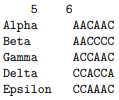

Se você quiser iniciar uma árvore filogenética usando as ferramentas do PHYLIP, um dos primeiros passos será criar um conjunto de muitos alinhamentos reamostrados usando a ferramenta bootseq. Isso nos retornará algo parecido com isso:

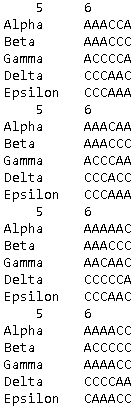

Vale lembrar que como é um exemplo, são poucos os alinhamentos mostrados, em casos da vida real são inúmeros dados de alinhamento.

Se você quiser ler o arquivo usando o Biopython basta fazer isso:

In [8]:
from Bio import AlignIO
alinhamentos = AlignIO.parse('resampled.phy', 'phylip')
for alinhamento in alinhamentos:
    print(alinhamento)
    print('\n')

Alignment with 5 rows and 6 columns
AAACCA Alpha
AAACCC Beta
ACCCCA Gamma
CCCAAC Delta
CCCAAA Epsilon


Alignment with 5 rows and 6 columns
AAACAA Alpha
AAACCC Beta
ACCCAA Gamma
CCCACC Delta
CCCAAA Epsilon


Alignment with 5 rows and 6 columns
AAAAAC Alpha
AAACCC Beta
AACAAC Gamma
CCCCCA Delta
CCCAAC Epsilon


Alignment with 5 rows and 6 columns
AAAACC Alpha
ACCCCC Beta
AAAACC Gamma
CCCCAA Delta
CAAACC Epsilon




Assim como o `Bio.SeqIO.parse()`, usar o `Bio.AlignIO.parse()` retornará um iterador. Se você quiser manter todos os alinhamentos na memória de uma vez, que pode ser acessados em qualquer ordem, basta transformar o iterador em uma lista:

In [9]:
from Bio import AlignIO
alinhamentos = list(AlignIO.parse('resampled.phy', 'phylip'))

In [10]:
primeiro_alinhamento = alinhamentos[0]
primeiro_alinhamento

<<class 'Bio.Align.MultipleSeqAlignment'> instance (5 records of length 6) at 6b78e15af0>

In [11]:
ultimo_alinhamento = alinhamentos[-1]
ultimo_alinhamento

<<class 'Bio.Align.MultipleSeqAlignment'> instance (5 records of length 6) at 6b78ce44c0>

### 6.1.3 Alinhamentos ambíguos

Muitos formatos de arquivo de alinhamento podem armazenar explicitamente mais de um alinhamento e a divisão entre eles é bem clara. Todavia, quando um formato de arquivo de sequência geral é usado, essa estrutura de bloco não existe. A situação mais comum de acontecer é quando os alinhamentos são salvos em arquivos FASTA. Cosidere a seguir como exemplo:

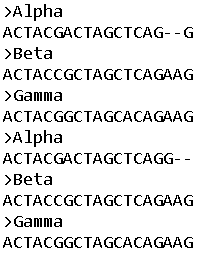

Este poderia ser um simples alinhamento contendo seis sequências (com os identificadores repetidos). Ou, julgando pelos identificadores, estes provavelmente são dois alinhamentos diferentes, cada um com três sequências, todos com o mesmo comprimento. Mas e com o exemplo abaixo?

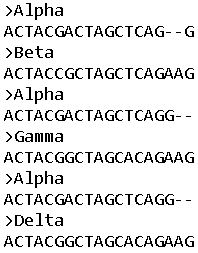

Novamente, este poderia ser um simples alinhamento com seis sequências. Todavia, desta vez, com base nos identificadores, podemos supor que se trata de três alinhamentos de pares que, por acaso, possuem o mesmo comprimento. O exemplo final é similar:

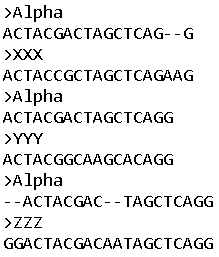

Neste exemplo, não podemos tratar como um único alinhamento como seis registros por conta dos comprimentos serem distintos. Por outro lado, as sequências podem serem interpretadas como três alinhamentos de pares.

Como podemos notar, armazenar mais de um alinhamento em arquivo FASTA não é o ideal. Entretanto, se você é forçado a trabalhar com eles como arquivos de entrada, o `Bio.AlignIO` pode lidar com a situação mais comum em que todos os alinhamentos possuem o mesmo número de registros. Um exemplo disso é uma coleção de alinhamentos de pares, que pode ser gerado pelas ferramentas water e needle do EMBOSS, embora nessa situação, o `Bio.AlignIO` consegue entender a saída nativa usando a string 'emboss' no segundo argumento.

Para interpretar os exemplos do arquivo FASTA como vários alinhamentos separados, podemos usar o `Bio.AlignIO.parse()` com o argumento **seq_count** que especifica quantas sequências são esperadas por cada alinhamento (3, 2 e 2; respectivamente). Como exemplo de código vamos usar o terceiro exemplo (o arquivo está no mesmo repositório que este documento):

In [12]:
from Bio import AlignIO
for alinhamento in AlignIO.parse('handle.fasta', 'fasta', seq_count=2):
    for registro in alinhamento:
        print(f'{registro.seq} - {registro.id}')
    print('\n')

ACTACGACTAGCTCAG--G - Alpha
ACTACCGCTAGCTCAGAAG - XXX


ACTACGACTAGCTCAGG - Alpha
ACTACGGCAAGCACAGG - YYY


--ACTACGAC--TAGCTCAGG - Alpha
GGACTACGACAATAGCTCAGG - ZZZ




Usar as funções **read** ou **parse** sem o argumento **seq_count** retornaria um único alinhamento contendo todos os seis registros para os primeiros exemplos. Para o terceiro exemplo, um exceção seria levantada porque os comprimentos das sequências diferem, evitando que eles sejam transformados um único alinhamento.

Se o formato de arquivo tiver uma estrutura de blocos permitido pelo `Bio.AlignIO` para determinar o número de sequências em cada alinhamento, o argumento **seq_count** não é necessário. Se fornecido mas não concondar com o conteúdo do arquivo, será retornado um erro.

Observe que o argumento **seq_count** é opcional e assume cada alinhamento no arquivo tem o mesmo número de sequências. Hipoteticamente você pode cair em situações estranhas, por exemplo, um arquivo FASTA contendo vários alinhamentos com cada um tendo diferentes quantidades de sequências. Supondo que você não possa obter os dados em um formato de arquivo mais adequado, não existe uma maneira direta de lidar com isso usando o `Bio.AlignIO`. Nesse caso, você pode considerar a leitura das sequências do arquivo em questão usando o `Bio.SeqIO` e agrupá-las para criar os alinhamentos conforme apropriado.

## 6.2 Escrevendo alinhamentos

**pag 77**